In [1]:
import cv2
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [2]:

def preprocess(image):
    
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh, thresh_img=cv2.threshold(blurred,210,255,cv2.THRESH_BINARY)
    t_img=cv2.cvtColor(thresh_img,cv2.COLOR_BGR2RGB)
    canny = cv2.Canny(t_img, 160, 255, 1)
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(canny, kernel, iterations=1)
    
    return dilate

In [11]:
def crop(pp_image,image):
    original=image.copy()
    cnts = cv2.findContours(pp_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    bigrect=[]
    image_number = 0
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        bigrect.append([x,y,x+w,y+h])

    left, top = np.min(bigrect, axis=0)[:2]  
    right, bottom = np.max(bigrect, axis=0)[2:]

    n=cv2.rectangle(image, (left,top), (right,bottom), (255, 0, 0), 2)
    crop=original[top:bottom,left:right]
    
    y=left+10
    x=top+10
    color=image[x,y]

    h_old, w_old,channels=crop.shape
    
    x_=h_old if h_old>w_old else w_old
    y_=h_old if h_old>w_old else w_old
    result = np.full((x_,y_, channels), color, dtype=np.uint8)
    x_center = (x_ - w_old) // 2
    y_center = (y_ - h_old) // 2
    
    result[y_center:y_center+h_old, 
       x_center:x_center+w_old] = crop
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.imshow(result)
    result_h=result.shape[0]
    result_w=result.shape[1]


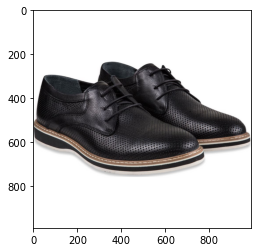

In [13]:
image = cv2.imread(r'file path')
pp_image=preprocess(image)
final_result=crop(pp_image,image)